<a href="https://colab.research.google.com/github/viraj-code1/NLP-Projects/blob/main/P1_Spam_Msg_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Message Classification
1.   Random Forest
2.   SVM



## 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('spam.tsv', sep='\t')

In [37]:
df.head()
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.isna().sum()
#check for missing values

In [ ]:
df.describe()
#descriptive statistics for numeric column

In [ ]:
df['label'].value_counts() / len(df)
#getting freq / % of values in "label" column

In [15]:
ham =df[df['label']== 'ham']
spam =df[df['label']== 'spam']

In [16]:
#getting no. of data entries
ham.shape, spam.shape

((4825, 4), (747, 4))

In [18]:
ham =ham.sample(spam.shape[0])
len(ham)
#randomly picking 747 (no.of spam msg) msg of ham 

747

In [20]:
#getting a data frame with 50% spam and 50% ham
data =ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [21]:
data.head()

,label,message,length,punct
0,ham,Yes i think so. I am in office but my lap is i...,115,2
1,ham,Hey pple...$700 or $900 for 5 nights...Excelle...,81,11
2,ham,Yup i thk so until e shop closes lor.,37,1
3,ham,Ok cool. See ya then.,21,2
4,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,156,3


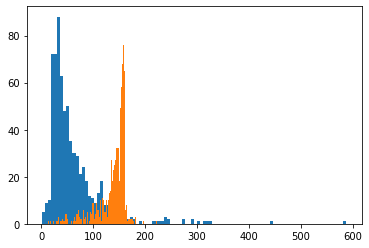

In [29]:
plt.hist(data[data['label']=='ham']['length'], bins=100)
plt.hist(data[data['label']=='spam']['length'],bins=100)
plt.show()

#high probability of longer msg to be spam

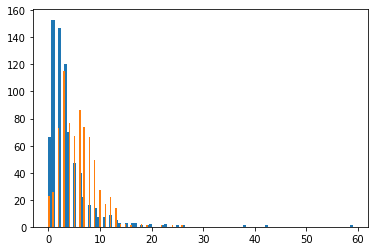

In [30]:
plt.hist(data[data['label']=='ham']['punct'], bins=100)
plt.hist(data[data['label']=='spam']['punct'],bins=100)
plt.show()
# cannot deduce anything

We now to separate data into training and testing sets



30% testing and 70% training

In [31]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test =train_test_split(data['message'], data['label'], test_size=0.3, random_state =0, shuffle =True)

# X-> message, y->label , predicting y on basis of X

In [50]:
print(X_train.shape)
print(X_test.shape)

(1045,)
(449,)


## 2) Building the Model (Random Forest)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [80]:
classifier =Pipeline([("tfidf", TfidfVectorizer()),("classifier", RandomForestClassifier(n_estimators=100))])


In [81]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

## 3) Predicting Results

In [58]:
y_pred =classifier.predict(X_test)

In [ ]:
y_test, y_pred

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:
accuracy_score(y_test, y_pred)

0.955456570155902

In [66]:
confusion_matrix(y_test, y_pred)

#      ham    spam   (pred)
# ham  226    1         
#spam  19    203 

array([[226,   1],
       [ 19, 203]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



## 4) Building Model SVM
  Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [73]:
svm =Pipeline([("tfidf", TfidfVectorizer()),("classifier",SVC(C=100, gamma= 'auto'))])


In [74]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

# 5) Predicting Results SVM

In [75]:
y_pred =svm.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.955456570155902

In [77]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 16, 206]])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.96       227
        spam       0.98      0.93      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



Time pass tests

In [86]:
test1 = ['Hello, your account is debited with Rs100.00']
test2 =['Congratulations , You have won a lottery ticket worth $1 million! to claim call on 446677']

In [87]:
print(classifier.predict(test1))
print(classifier.predict(test2))

['ham']
['spam']
